---

# <center> Deteccion de correos Spam 


---

### Dataset:
El dataset fue extraido de [Kraggle](https://www.kaggle.com/code/yasserh/email-spam-detection-comparing-best-ml-models)
### Objetivos
* Entender el dataset y limpiarlo con diferentes tecnicas
* Construir los modelos de clasificacion
* Comparar resultados

---

---

# <center> Pasos:

1. Exploracion de datos
2. Exploracion de analisis de datos EDA
3. Preprocesamiento de datos
4. Manipulacion de datos
5. Seleccion y extraccion
6. Modelos predictivos
7. Conclusion

---

# <center>1. Exploracion de datos

---

In [1]:
# Importing the basic librarires
import numpy as np
import pandas as pd
import seaborn as sns
from classes.base import SMOTE, NaiveBayes, KNeighbors, VIF, DecisionTreeClassifier

from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [2]:
# Importing the dataset
raw_data = pd.read_csv(
    r'.\data\Spam.csv',
    header=0,
    index_col=False)

target = 'spam'
labels = ['Ham','Spam']
features = [i for i in raw_data.columns.values if i not in [target]]

original_df = raw_data.copy(deep=True)
display(raw_data.head())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,...,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,...,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
# Checking the dtypes of all the columns
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [4]:
# Checking number of unique rows in each feature
# Checking if there is a categorical feature
uniques = raw_data[features].nunique().sort_values()
numerical_feature = []
categorical_feature = []

for i in range(raw_data[features].shape[1]):
    if uniques.values[i] <= 7:
        categorical_feature.append(uniques.index[i])
    else:
        numerical_feature.append(uniques.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(numerical_feature),len(categorical_feature)))


Inference: The Datset has 57 numerical & 0 categorical features.


In [5]:
#Checking the stats of all the columns

display(raw_data.describe())

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,...,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,...,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

# <center> 2. Exploracion de analisis de datos(EDA)

---

            Target Variable Distribution           


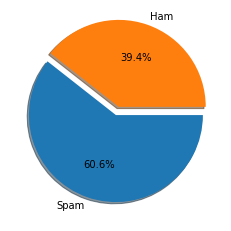

In [6]:
# Let us first analyze the distribution of the target variable
map_target_class = {}
for class_target, value in enumerate(raw_data[target].unique()):
    map_target_class[value] = labels[class_target]

exploratory_data = raw_data.copy()
exploratory_data[target] = exploratory_data[target].map(map_target_class)
explode = np.zeros(len(labels))
explode[-1] = 0.1
print('\033[1mTarget Variable Distribution'.center(55))
plt.pie(
    exploratory_data[target].value_counts(),
    labels=exploratory_data[target].value_counts().index,
    counterclock=False,
    shadow=True, 
    explode=explode,
    autopct='%1.1f%%',
    radius=1,
    startangle=0)
plt.show()

# <center> 3. Preprocesamiento de datos

---

In [7]:
# Removal of any Duplicate rows (if any)
counter = 0
r,c = original_df.shape

exploratory_data = raw_data.copy()
exploratory_data.drop_duplicates(inplace=True)
exploratory_data.reset_index(drop=True, inplace=True)

if exploratory_data.shape == (r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped ---> {r-exploratory_data.shape[0]}')


Inference: Number of duplicates dropped ---> 391


In [8]:
# Fixing the imbalance using SMOTE Technique

data_smote = exploratory_data.copy()

print('Original class distribution:')
print(data_smote[target].value_counts())

smote = SMOTE()
smote.fit(data_smote, target)

data_resample = smote.resample(35)
data_smote = pd.concat([data_smote, data_resample], ignore_index=True)

data_smote[target] = data_smote[target].astype(np.int64)
print('\nClass distribution after applying SMOTE Technique:')
print(data_smote[target].value_counts())

Original class distribution:
0    2531
1    1679
Name: spam, dtype: int64

Class distribution after applying SMOTE Technique:
0    2531
1    2266
Name: spam, dtype: int64


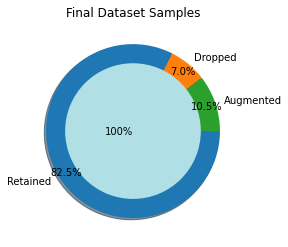


Inference:The final dataset after cleanup has 58 samples & 4601 rows.


In [9]:
# Final Dataset size after performing Preprocessing
ratios = [raw_data.shape[0], original_df.shape[0] - exploratory_data.shape[0], data_smote.shape[0] - exploratory_data.shape[0]]
labels = ['Retained','Dropped','Augmented']
plt.title('Final Dataset Samples')
plt.pie(
    ratios,
    radius = 1,
    shadow=True,
    labels=labels,
    counterclock=False,
    autopct='%1.1f%%',
    pctdistance=0.9,
    explode=[0,0,0])
plt.pie(
    [raw_data.shape[0]],
    labels=['100%'],
    labeldistance=-0,
    radius=0.78,
    shadow=True,
    colors=['powderblue'])
plt.show()

print('\n\033[1mInference:\033[0mThe final dataset after cleanup has {} samples & {} rows.'.format(raw_data.shape[1], raw_data.shape[0]))

# <center> 4. Manipulacion de datos

In [10]:
#Splitting the data intro training & testing sets
model_data = data_smote.copy()
model_data.columns=[i.replace('[','_') for i in model_data.columns]

model_features = model_data.drop([target],axis=1)
model_classes = model_data[target]
train_X, test_X, train_Y, test_Y = train_test_split(model_features, model_classes, train_size=0.8, test_size=0.2, random_state=0)
 
print(
    'Original set  ---> ',
    model_features.shape, model_classes.shape,
    '\nTraining set  ---> ',
    train_X.shape, train_Y.shape,
    '\nTesting set   ---> ',
    test_X.shape,'', test_Y.shape)

Original set  --->  (4797, 57) (4797,) 
Training set  --->  (3837, 57) (3837,) 
Testing set   --->  (960, 57)  (960,)


In [11]:
# Feature Scaling (Standardization)
std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
train_X_std = std.fit_transform(train_X)
train_X_std = pd.DataFrame(train_X_std, columns =model_features.columns)
display(train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
test_X_std = std.transform(test_X)
test_X_std = pd.DataFrame(test_X_std, columns=model_features.columns)
display(test_X_std.describe())

                               Standardardization on Training set                               


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,...,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3837.000000,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03,3.837000e+03
mean,-3.333273e-17,-3.703637e-18,-8.888729e-17,1.296273e-17,1.481455e-17,1.851818e-17,2.037000e-17,-2.777728e-18,5.555455e-17,-2.222182e-17,-6.203592e-17,7.407274e-17,2.222182e-17,-1.018500e-17,2.037000e-17,2.592546e-17,-7.407274e-17,-3.425864e-17,6.296183e-17,1.666637e-17,1.111091e-17,-5.462864e-17,-5.925819e-17,-3.333273e-17,-5.925819e-17,...,5.555455e-18,9.722047e-18,-7.407274e-18,-5.555455e-17,-5.092501e-17,1.851818e-18,-2.592546e-17,-3.333273e-17,-1.111091e-17,-4.444364e-17,4.166591e-17,-7.870228e-18,-4.074001e-17,2.499955e-17,9.259092e-19,0.000000,-1.851818e-17,8.819285e-17,1.666637e-17,-2.962910e-17,2.129591e-17,-3.240682e-18,-2.037000e-17,-3.703637e-17,8.425774e-17
std,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,...,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00,1.000130e+00
min,-3.735015e-01,-2.616311e-01,-5.920341e-01,-5.826276e-02,-5.018321e-01,-3.733604e-01,-3.259636e-01,-2.661319e-01,-3.473693e-01,-3.895630e-01,-3.241978e-01,-6.459345e-01,-3.234356e-01,-1.834602e-01,-1.976124e-01,-3.450492e-01,-3.512820e-01,-3.703341e-01,-1.013980e+00,-2.088674e-01,-7.427658e-01,-1.371033e-01,-3.135017e-01,-2.451625e-01,-3.307358e-01,...,-1.723446e-01,-1.458423e-01,-1.944212e-01,-2.472924e-01,-3.393507e-01,-5.838318e-02,-1.969712e-01,-1.912732e-01,-1.242962e-01,-1.703954e-01,-2.051591e-01,-1.233095e-01,-3.064010e-01,-1.920388e-01,-7.679517e-02,-0.115687,-1.593915e-01,-6.111855e-01,-1.618704e-01,-3.525434e-01,-3.469169e-01,-1.085214e-01,-1.342674e-01,-3.917575e-01,-5.344662e-01
25%,-3.735015e-01,-2.616311e-01,-5.920341e-01,-5.826276e-02,-5.018321e-01,-3.733604e-01,-3.259636e-01,-2.661319e-01,-3.473693e-01,-3.895630e-01,-3.241978e-01,-6.459345e-01,-3.234356e-01,-1.834602e-01,-1.976124e-01,-3.450492e-01,-3.512820e-01,-3.703341e-01,-9.852070e-01,-2.088674e-01,-7.427658e-01,-1.371033e-01,-3.135017e-01,-2.451625e-01,-3.307358e-01,...,-1.723446e-01,-1.458423e-01,-1.944212e-01,-2.472924e-01,-3.393507e-01,-5.838318e-02,-1.969712e-01,-1.912732e-01,-1.242962e-01,-1.70


                                Standardardization on Testing set                                


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,...,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq__,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,...,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000
mean,0.002201,0.006774,0.074603,-0.053195,-0.027151,-0.026064,-0.028266,0.008694,0.026136,0.033604,0.004472,-0.005017,0.020345,-0.006644,-0.012592,0.001555,-0.025811,-0.031164,0.005314,0.028720,-0.041969,-0.008495,-0.037203,0.001018,-0.038931,...,-0.021462,-0.032714,-0.055845,-0.033132,-0.046322,-0.013965,0.035494,-0.042449,-0.004000,-0.041758,0.007629,-0.027535,0.048470,-0.002471,0.010375,0.015119,0.010621,0.036795,-0.020438,-0.003834,-0.024475,0.002227,0.009494,0.069331,0.044080
std,1.072788,0.945985,1.097773,0.055378,0.889503,0.868642,0.898938,0.848250,1.027586,0.986011,0.931342,0.916570,0.889215,0.992879,0.873358,0.944002,0.995409,0.922503,0.997233,1.612827,0.921452,1.045756,0.925976,1.198965,0.986701,...,0.839407,0.821632,0.680606,0.819876,1.029560,0.419105,1.525450,0.774212,0.995862,0.819388,1.097963,0.671800,1.199804,0.898607,1.522739,1.266613,1.043454,1.653203,0.740516,0.743085,0.779027,0.663840,0.915185,2.531112,1.452327
min,-0.373502,-0.261631,-0.592034,-0.058263,-0.501832,-0.373360,-0.325964,-0.266132,-0.347369,-0.389563,-0.324198,-0.645935,-0.323436,-0.183460,-0.197612,-0.345049,-0.351282,-0.370334,-1.013980,-0.208867,-0.742766,-0.137103,-0.313502,-0.245162,-0.330736,...,-0.172345,-0.145842,-0.194421,-0.247292,-0.339351,-0.058383,-0.196971,-0.191273,-0.124296,-0.170395,-0.205159,-0.123310,-0.306401,-0.192039,-0.076795,-0.115687,-0.159391,-0.611186,-0.161870,-0.352543,-0.346917,-0.108521,-0.134267,-0.391758,-0.532703
25%,-0.373502,-0.261631,-0.592034,-0.058263,-0.501832,-0.373360,-0.325964,-0.266132,-0.347369,-0.389563,-0.324198,-0.645935,-0.323436,-0.183460,-0.197612,-0.345049,-0.351282,-0.370334,-1.002471,-0.208867,-0.742766,-0.137103,-0.313502,-0.245162,-0.330736,...,-0.172345,-0.145842,-0.194421,-0.247292,-0.339351,-0.058383,-0.196971,-0.191273,-0.124296,-0.170395,-0.205159,-0.123310,-0.306401,-0.192039,-0.076795,-0.115687,-0.159391,-0.611186,-0.161870,-0.352543,-0.346917,-0.108521,-0.115763,-0.347860,-0.464392
50%,-0.373502,-0.261631,-0.592034,-0.058263,-0.501832,-0.373360,-0.325964,-0.266132,-0.347369,-0.389563,-0.324198,-0.334741,-0.323436,-0.183460,-0.197612,-0.345049,-0.351282,-0.370334,-0.156544,-0.208867,-0.419354,-0.137103,-0.313502,-0.245162,-0.330736,...,-0.172345,-0.145842,-0.194421,-0.247292,-0.339351,-0.058383,-0.196971,-0.191273,-0.124296,-0.170395,-0.205159,-0.123310,-0.306401,-0.192039,-0.076795,-0.115687,-0.159391,-0.281990,-0.161870,-0.258633,-0.346917,-0.108521,-0.095333,-0.274696,-0.346721
75%,-0.202826,-0.261631,0.413958,-0.058263,0.145379,-0.266638,-0.325964,-0.266132,-0.347369,0.070332,-0.324198,0.322222,-0.323436,-0.183460,-0.197612,-0.057253,

# <center> 5. Seleccion y extraccion

---

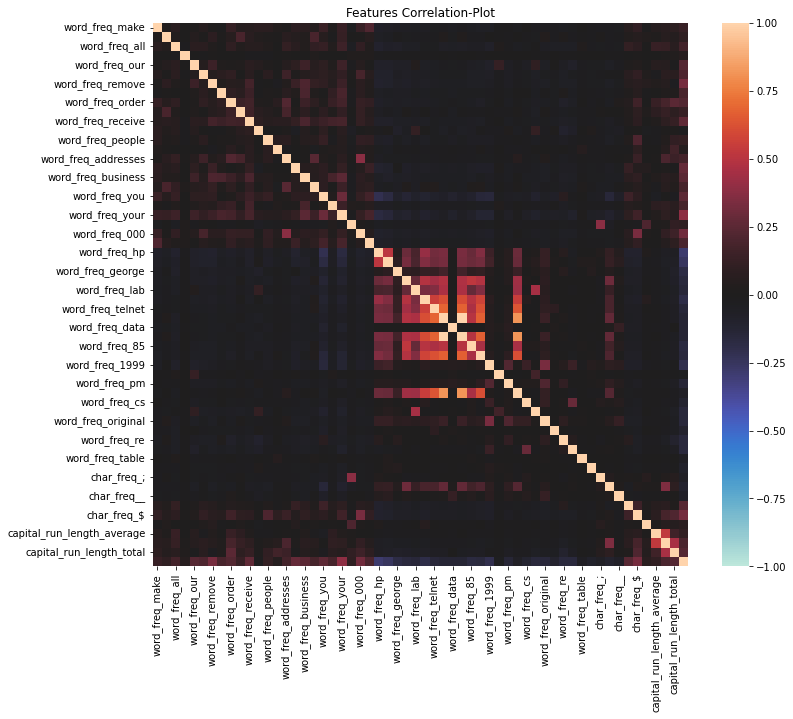

In [12]:
# Checking the correlation

features = model_data.columns
plt.figure(figsize=[12,10])
plt.title('Features Correlation-Plot')
sns.heatmap(model_data[features].corr(method='pearson'), vmin=-1, vmax=1, center=0) 
plt.show()

**Strategy:** \
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)
3. Decomposition Method - Principle Component Analysis (PCA)

## 5a. Manual Method - VIF

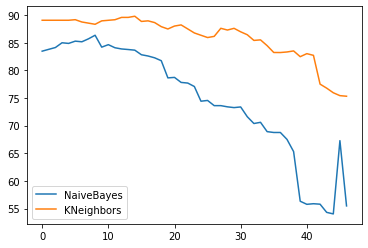

In [13]:
# Calculate the VIFs to remove multicollinearity
vif_selector = VIF()
vif_selector.fit(train_X_std, train_Y)

# Models to to test againts the VIF
bayes_ = NaiveBayes()
knn_ = KNeighbors(5)

feature_X_selected, scores = vif_selector.transform(bayes_, knn_, test_features=test_X_std, test_target=test_Y)

for model_name, score in scores.items():
    plt.plot(score, label=model_name)
plt.legend()
plt.show()

In [14]:
feature_X_selected.head()

,word_freq_3d
0,-0.058263
1,-0.058263
2,-0.058263
3,-0.058263
4,-0.058263


In [15]:
# Calculate the VIFs to remove multicollinearity
vif_selector = VIF(20)
vif_selector.fit(train_X_std, train_Y)

# Models to to test againts the VIF
bayes_ = NaiveBayes()
knn_ = KNeighbors(5)

feature_X_selected, scores = vif_selector.transform(bayes_, knn_, test_features=test_X_std, test_target=test_Y)

In [16]:
feature_X_selected.head()

,word_freq_3d,word_freq_over,word_freq_internet,word_freq_mail,word_freq_will,word_freq_people,word_freq_report,word_freq_email,word_freq_george,word_freq_parts,word_freq_pm,word_freq_cs,word_freq_project,word_freq_table,word_freq_conference,char_freq_;,char_freq__,char_freq_!,char_freq_hash,capital_run_length_average
0,-0.058263,-0.373360,-0.266132,-0.389563,0.840877,-0.323436,-0.183460,-0.370334,-0.195292,-0.058383,-0.196971,-0.124296,-0.123310,-0.076795,-0.115687,-0.159391,-0.161870,-0.352543,-0.108521,-0.047268
1,-0.058263,0.765014,-0.177857,0.251086,0.933083,2.495001,4.871107,0.033179,-0.195292,-0.058383,-0.196971,-0.124296,-0.092166,0.528511,-0.115687,-0.092304,-0.161870,0.383759,0.292923,-0.061624
2,-0.058263,0.380813,-0.266132,-0.066188,-0.377386,0.719710,-0.183460,-0.370334,-0.195292,-0.058383,-0.196971,-0.124296,-0.123310,-0.076795,-0.115687,-0.159391,-0.161870,-0.314518,-0.108521,-0.107710
3,-0.058263,-0.373360,-0.266132,1.074778,0.840877,-0.323436,-0.183460,-0.370334,-0.195292,-0.058383,0.656154,-0.124296,1.885474,-0.076795,-0.115687,-0.159391,0.295477,-0.352543,-0.108521,-0.108221
4,-0.058263,-0.373360,-0.266132,0.296847,-0.645935,-0.323436,-0.183460,0.455033,-0.195292,-0.058383,-0.196971,-0.124296,-0.123310,-0.076795,-0.115687,0.075416,-0.161870,-0.288016,0.015000,-0.004980


# <center> 6. Modelos predictivos

---

## Naive Bayes Classfier:

In [17]:
# Building Naive Bayes Classifier
NB_model = NaiveBayes()

NB_model.fit(feature_X_selected.values, train_Y)
test_X_std = test_X_std[feature_X_selected.columns]
predictions = NB_model.predict(test_X_std.values)
confusion_matrix(test_Y, predictions)

array([[230, 264],
       [ 32, 434]], dtype=int64)

## K-Nearest Neighbours Classfier:

---

In [18]:
# Building K-Neareset Neighbours Classifier
KNN_model = KNeighbors()

KNN_model.fit(feature_X_selected.values, train_Y.values)
predictions = KNN_model.predict(test_X_std.values)

confusion_matrix(test_Y, predictions)

array([[418,  76],
       [ 85, 381]], dtype=int64)

In [19]:

treeModel = DecisionTreeClassifier()
tree = treeModel.build_decision_tree(feature_X_selected.values, train_Y.values, max_depth=7)

new_instance = np.array([0.5, 0.3, 0.2, 0.1, 0.6, 0.7, 0.2, 0.4, 0.3, 0.1, 0.4, 0.5, 0.2, 0.1,
                         0.3, 0.5, 0.6, 0.2, 0.4, 0.7, 0.2, 0.3, 0.1, 0.2, 0.4, 0.5, 0.1, 0.2,
                         0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                         0.7, 0.8, 0.9, 1.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                         100])

prediction = predict(new_instance, tree)
print("Predicción:", prediction)

NameError: name 'find_best_split' is not defined

---

# <center> 7. Conclusion

- Se pueden realizar muchas otras pruebas y probar con mas modelos para observar cual es el mejor modelo para decidir si es o no es un correo spam